In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 데이터 수집

In [2]:
summary = pd.read_csv('news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
summary.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [4]:
raw.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [5]:
summary['text'][:5] #뉴스 요약글

0    The Administration of Union Territory Daman an...
1    Malaika Arora slammed an Instagram user who tr...
2    The Indira Gandhi Institute of Medical Science...
3    Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4    Hotels in Maharashtra will train their staff t...
Name: text, dtype: object

In [6]:
summary['ctext'][:5] #뉴스 전체 기사

0    The Daman and Diu administration on Wednesday ...
1    From her special numbers to TV?appearances, Bo...
2    The Indira Gandhi Institute of Medical Science...
3    Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4    Hotels in Mumbai and other Indian cities are t...
Name: ctext, dtype: object

In [7]:
summary['headlines'][:5] #뉴스 헤드라인

0    Daman & Diu revokes mandatory Rakshabandhan in...
1    Malaika slams user who trolled her for 'divorc...
2    'Virgin' now corrected to 'Unmarried' in IGIMS...
3    Aaj aapne pakad liya: LeT man Dujana before be...
4    Hotel staff to get training to spot signs of s...
Name: headlines, dtype: object

In [8]:
print('전체 뉴스 개수 : ',len(summary),'전체 뉴스 추가 개수 : ',len(raw))

전체 뉴스 개수 :  4514 전체 뉴스 추가 개수 :  98401


In [9]:
summary.tail()

,author,date,headlines,read_more,text,ctext
4509,Mansha Mahajan,"24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...,http://indiatoday.intoday.in/story/rasna-eyes-...,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m..."
4510,Dishant Sharma,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...,http://indiatoday.intoday.in/story/sachin-tend...,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted ...
4511,Tanya Dhingra,"03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...,http://www.hindustantimes.com/bollywood/secret...,"Aamir Khan, while talking about reality shows ...","Aamir Khan, whose last film Dangal told the st..."
4512,Pragya Swastik,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused...",http://indiatoday.intoday.in/story/singer-asha...,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Bawa...
4513,Chhavi Tyagi,"03 Aug 2017,Thursday",More than half of India's languages may die in...,http://indiatoday.intoday.in/story/indian-lang...,At least 400 languages or more than half langu...,More than half of the languages spoken by Indi...


In [10]:
news=summary[['headlines','text']] #헤드라인과 요약문만 갖고 옴
news.head()

,headlines,text
0,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...
1,Malaika slams user who trolled her for 'divorc...,Malaika Arora slammed an Instagram user who tr...
2,'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...
3,Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotel staff to get training to spot signs of s...,Hotels in Maharashtra will train their staff t...


In [83]:
summary['headlines'][0]

'Daman & Diu revokes mandatory Rakshabandhan in offices order'

In [84]:
summary['text'][0]

'The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.'

In [85]:
summary['ctext'][0]

'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dama

In [11]:
len(news) #뉴스 기사 전체 개수

4514

In [12]:
df1=pd.concat([news,raw]) #두 데이터 합치기
df1

,headlines,text
0,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...
1,Malaika slams user who trolled her for 'divorc...,Malaika Arora slammed an Instagram user who tr...
2,'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...
3,Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotel staff to get training to spot signs of s...,Hotels in Maharashtra will train their staff t...
...,...,...
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98399,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


In [13]:
df1.sample(10)

,headlines,text
4946,Veteran CPI(M) leader Nirupam Sen passes away ...,Veteran Communist Party of India (Marxist) lea...
61471,"Judoka, unbeaten for 7 years, wins record 10th...",French judoka Teddy Riner won all-time record ...
12793,"Accident not Railways' fault, no action agains...",Talking about the Amritsar train accident that...
28407,India won't let forces of hatred come near its...,White hosting an Eid reception for envoys in N...
526,Jason Holder becomes number 1 Test all-rounder,Windies captain Jason Holder became the top-ra...
27777,AndrÃÂ©s Manuel LÃÂ³pez Obrador elected Mexi...,AndrÃÂ©s Manuel LÃÂ³pez Obrador has been ele...
3386,Samajwadi Party MLC's drunk kin slaps cop in p...,The nephew of Samajwadi Party MLC Ramesh Yadav...
43863,Organise against Trump or we'll die: NZ envoy ...,"A New Zealand diplomat to the US, Caroline Ber..."
85383,Over 900 inmates escape Congo prison after mil...,Militants attacked a prison in the Democratic ...
28206,Mastermind of Kashmir editor's murder did MBA ...,The mastermind of 'Rising Kashmir' editor Shuj...


## 데이터 전처리

In [14]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', df1['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', df1['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 100227
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 99916


In [15]:
df1.drop_duplicates(subset=['text'], inplace=True)
print("전체 샘플수 :", len(df1))

전체 샘플수 : 100227


In [16]:
print(df1.isnull().sum())

headlines    0
text         0
dtype: int64


In [17]:
# 전처리 함수 내 사용
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [18]:
stop_words=set(stopwords.words('english'))
print('불용어 개수 : ',len(stop_words))
print(stop_words)

불용어 개수 :  179
{'couldn', 'in', 'm', "hadn't", 'his', 'from', 'them', 'about', 'out', 'myself', 'was', "should've", 'while', 'that', 'then', "she's", 'didn', 'be', 'below', 'more', 'doing', 'are', "you're", 'shan', "it's", 'on', "shan't", 'ain', 'doesn', 'at', 'these', 'it', 'having', 'for', "aren't", 'won', "hasn't", 'such', 'she', 'who', 'once', "couldn't", 'when', 'y', "didn't", 'into', 'haven', 'did', "weren't", 'both', "don't", 'other', 'wouldn', 'here', 'few', 're', 'only', 'a', 'of', 'those', "you've", "needn't", "wasn't", 'why', 'an', 'not', 'nor', "shouldn't", 'yours', 'this', 'isn', 'until', "mightn't", 'just', 'or', 'very', 'mightn', 'most', 'have', 'being', 'hasn', 'as', 'wasn', 'do', 'me', 'off', 'hers', 's', 'your', 'same', 'd', 'himself', 'but', 'hadn', 'if', 'what', "won't", 'my', 'he', 'whom', "wouldn't", 'can', 'to', 'than', 'been', 'shouldn', 'because', 'so', 'further', "that'll", 'ma', 'by', 'with', 'again', 'some', 'under', 'mustn', 'll', 'they', 'needn', 'the', 'th

In [19]:
def preprocess_sentence(sentence,remove_stopwords=True):
    sentence=sentence.lower()
#     sentence=BeautifulSoup(sentence,'lxml')
#     sentence=re.sub(r'\([^)]*\)','',sentence)
#     sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence=' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ") ])
    sentence=re.sub(r"'s\b","",sentence) #소유격 제거
    sentence = re.sub("[^a-zA-Z]", " ", sentence) #특수기호 제거
    sentence=re.sub('[m]{2,}','mm',sentence) #m이 2개 이상일 경우 mm으로 대체
    if remove_stopwords:#text에만 불용어제거
        tokens=' '.join(word for word in sentence.split() if not word in stop_words
                       if len(word)>1) #한 단어일 경우 제거
    else:#headlines에는 불용어 미제거
        tokens=' '.join(word for word in sentence.split() if len(word)>1)
    return tokens

In [21]:
clean_text=[] #text 열 전처리
for s in df1['text']:
    clean_text.append(preprocess_sentence(s))
clean_text[:5]

['administration union territory daman diu revoked order made compulsory women tie rakhis male colleagues occasion rakshabandhan august administration forced withdraw decision within hours issuing circular received flak employees slammed social media',
 'malaika arora slammed instagram user trolled divorcing rich man fun alimony life wearing short clothes going gym salon enjoying vacation user commented malaika responded certainly got get damn facts right spewing sh know nothing',
 'indira gandhi institute medical sciences igims patna thursday made corrections marital declaration form changing virgin option unmarried earlier bihar health minister defined virgin unmarried woman consider term objectionable institute however faced strong backlash asking new recruits declare virginity form',
 'lashkar taiba kashmir commander abu dujana killed security forces said kabhi hum aage kabhi aap aaj aapne pakad liya mubarak ho aapko today caught congratulations caught added surrender whatever fate

In [22]:
df1['text'][:5]

0    The Administration of Union Territory Daman an...
1    Malaika Arora slammed an Instagram user who tr...
2    The Indira Gandhi Institute of Medical Science...
3    Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4    Hotels in Maharashtra will train their staff t...
Name: text, dtype: object

In [23]:
clean_summary = [] #headline 열 전처리
for s in df1['headlines']:
    clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]

['daman diu revokes mandatory rakshabandhan in offices order',
 'malaika slams user who trolled her for divorcing rich man',
 'virgin now corrected to unmarried in igims form',
 'aaj aapne pakad liya let man dujana before being killed',
 'hotel staff to get training to spot signs of sex trafficking']

In [24]:
df1['headlines'][:5]

0    Daman & Diu revokes mandatory Rakshabandhan in...
1    Malaika slams user who trolled her for 'divorc...
2    'Virgin' now corrected to 'Unmarried' in IGIMS...
3    Aaj aapne pakad liya: LeT man Dujana before be...
4    Hotel staff to get training to spot signs of s...
Name: headlines, dtype: object

In [25]:
#전처리 한 열들 정리
df1['text']=clean_text
df1['headlines']=clean_summary

In [26]:
#길이가 공백인 샘플은 null로 변환
df1.replace('', np.nan, inplace=True)
print(df1.isnull().sum())

headlines    0
text         0
dtype: int64


In [27]:
print('전체 샘플수 :',(len(df1)))

전체 샘플수 : 100227


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.2701667215421
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.293503746495455


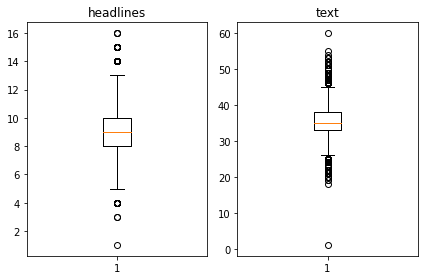

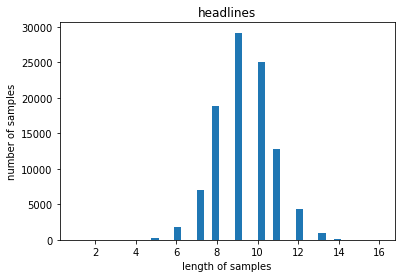

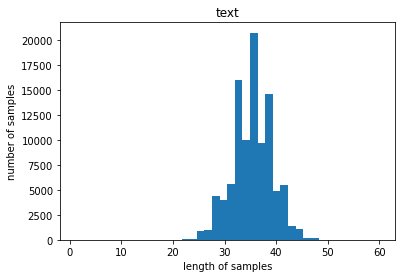

In [28]:
#텍스트,요약 분포도
text_len=[len(s.split()) for s in df1['text']]
headlines_len=[len(s.split()) for s in df1['headlines']]
print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

원문은 대체적으로 50 이하의 길이를 가지는 편인데 비해 요약은 8~10 사이에 분포되어있습니다

In [29]:
text_max_len=35
headlines_max_len=10

In [30]:
def below_threshold_len(max_len,nested_list):
    cnt=0
    for s in nested_list:
        if(len(s.split())<=max_len):
            cnt=cnt+1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [31]:
below_threshold_len(text_max_len, df1['text'])

전체 샘플 중 길이가 35 이하인 샘플의 비율: 0.5231624213036408


In [32]:
below_threshold_len(headlines_max_len, df1['headlines'])

전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.8175341973719656


In [33]:
df1 = df1[df1['text'].apply(lambda x: len(x.split()) <= text_max_len)]
df1 = df1[df1['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :',(len(df1)))

전체 샘플수 : 42215


In [34]:
len(df1)

42215

In [35]:
df1.head()

,headlines,text
0,daman diu revokes mandatory rakshabandhan in o...,administration union territory daman diu revok...
1,malaika slams user who trolled her for divorci...,malaika arora slammed instagram user trolled d...
6,delhi hc reduces aid for negligent accident vi...,delhi high court reduced compensation awarded ...
7,yr old lynched over rumours she was cutting pe...,year old dalit woman allegedly lynched agra vi...
8,chopper flying critically low led to bombay hi...,inquiry aircraft accident investigation bureau...


In [36]:
df1['headlines']=df1['headlines'].apply(lambda x : 'sostoken '+ x + ' eostoken')
df1.head()
#headlines 앞 뒤에 sostoken,eostoken 추가

,headlines,text
0,sostoken daman diu revokes mandatory rakshaban...,administration union territory daman diu revok...
1,sostoken malaika slams user who trolled her fo...,malaika arora slammed instagram user trolled d...
6,sostoken delhi hc reduces aid for negligent ac...,delhi high court reduced compensation awarded ...
7,sostoken yr old lynched over rumours she was c...,year old dalit woman allegedly lynched agra vi...
8,sostoken chopper flying critically low led to ...,inquiry aircraft accident investigation bureau...


In [37]:
text_data=list(df1['text']) 
summary_data=list(df1['headlines'])
#기사데이터,요약데이터(헤드라인) 저장

In [38]:
#데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_data, summary_data, test_size=0.2, random_state=0, shuffle=True)
print('훈련 데이터의 개수 :', len(x_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(x_test))
print('테스트 레이블의 개수 :',len(y_test))

훈련 데이터의 개수 : 33772
훈련 레이블의 개수 : 33772
테스트 데이터의 개수 : 8443
테스트 레이블의 개수 : 8443


In [39]:
#원문 토큰화
src_tokenizer=Tokenizer()
src_tokenizer.fit_on_texts(x_train)

In [40]:
threshold=7
total_cnt=len(src_tokenizer.word_index) #단어의 수
rare_cnt=0 #threshold보다 작은 단어 등장 수
total_freq=0 #전체 단어 빈도수 총합
rare_freq=0 #threshold보다 작은 단어 등장 수 총합

for key,value in src_tokenizer.word_counts.items():
    total_freq=total_freq+value
    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value<threshold):
        rare_cnt=rare_cnt+1
        rare_freq=rare_freq+value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 45596
등장 빈도가 6번 이하인 희귀 단어의 수: 31945
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 13651
단어 집합에서 희귀 단어의 비율: 70.06097026054917
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.008014582595132


In [41]:
src_vocab = 10000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(x_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
x_train = src_tokenizer.texts_to_sequences(x_train) 
x_test = src_tokenizer.texts_to_sequences(x_test)

In [42]:
print(x_train[:5])

[[901, 87, 1228, 803, 4386, 2622, 5067, 8608, 6528, 796, 1151, 8608, 2223, 3222, 1262, 704, 1367, 3960, 1538, 8608, 4387, 8608, 6528, 1, 531], [173, 17, 1105, 622, 3, 13, 61, 4835, 6529, 22, 232, 6164, 1506, 333, 216, 38, 9910, 2053, 3042, 2505, 17, 38, 2272, 6164, 522, 383, 4835, 10, 1644, 415, 7, 581, 1080], [272, 1255, 1446, 709, 15, 59, 2678, 1, 288, 973, 59, 3888, 4570, 16, 709, 2735, 408, 372, 316, 1235, 1045, 304, 4, 1753, 1255, 2678, 2, 1255, 4, 1487], [26, 8, 9001, 3355, 1299, 682, 134, 63, 1, 70, 85, 1691, 1990, 587, 282, 1299, 797, 26, 40, 134, 92, 1820, 15, 2875, 266, 2709, 1513, 5569, 1299], [9, 2710, 2273, 478, 1, 209, 4954, 2273, 155, 893, 21, 35, 24, 1777, 399, 893, 21, 276, 14, 1470, 1778, 780, 305, 138, 103, 7938, 767]]


In [43]:
#헤드라인 데이터 토큰화
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(y_train)

In [44]:
threshold=6
total_cnt=len(tar_tokenizer.word_index)
rare_cnt=0
total_freq=0
rare_freq=0
for key,value in tar_tokenizer.word_counts.items():
    total_freq=total_freq+value
    if(value<threshold):
        rare_cnt=rare_cnt+1
        rare_freq=rare_freq+value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 21239
등장 빈도가 5번 이하인 희귀 단어의 수: 14834
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 6405
단어 집합에서 희귀 단어의 비율: 69.84321295729555
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.723496050842496


In [45]:
tar_vocab=8000
tar_tokenizer=Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(y_train)
#텍스트를 정수 시퀀스로 변환
y_train = tar_tokenizer.texts_to_sequences(y_train) 
y_test = tar_tokenizer.texts_to_sequences(y_test) 

In [46]:
print(y_train[:5])
type(y_train)

[[1, 851, 2528, 97, 1208, 5724, 7256, 19, 4106, 2], [1, 70, 1998, 96, 29, 72, 34, 3376, 5, 4737, 17, 2], [1, 1999, 6, 6406, 5, 163, 111, 6407, 1870, 2], [1, 24, 23, 227, 4, 387, 6, 442, 1001, 2], [1, 2337, 985, 258, 3844, 4, 334, 1481, 2]]


list

In [47]:
#빈 샘플 제거
drop_train = [index for index, sentence in enumerate(y_train) if len(sentence) == 2]
drop_test = [index for index, sentence in enumerate(y_test) if len(sentence) == 2]

In [48]:
print('훈련 데이터의 개수 :', len(x_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(x_test))
print('테스트 레이블의 개수 :',len(y_test))

훈련 데이터의 개수 : 33772
훈련 레이블의 개수 : 33772
테스트 데이터의 개수 : 8443
테스트 레이블의 개수 : 8443


In [49]:
x_train=np.delete(x_train,drop_train,axis=0)
x_test=np.delete(x_test,drop_test,axis=0)
y_train=np.delete(y_train,drop_train,axis=0)
y_test=np.delete(y_test,drop_test,axis=0)

print('훈련 데이터의 개수 :', len(x_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(x_test))
print('테스트 레이블의 개수 :',len(y_test))
x_test.shape

훈련 데이터의 개수 : 33772
훈련 레이블의 개수 : 33772
테스트 데이터의 개수 : 8442
테스트 레이블의 개수 : 8442


(8442,)

In [50]:
#패딩 작업
x_train=pad_sequences(x_train,maxlen=text_max_len,padding='post')
x_test=pad_sequences(x_test,maxlen=text_max_len,padding='post')
y_train=pad_sequences(y_train,maxlen=headlines_max_len,padding='post')
y_test=pad_sequences(y_test,maxlen=headlines_max_len,padding='post')

## 모델 설계 및 훈련

In [51]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [52]:
embedding_dim=64
hidden_size=128
encoder_inputs=Input(shape=(text_max_len,)) #인코더
enc_emb=Embedding(src_vocab,embedding_dim)(encoder_inputs)#임베딩층

encoder_lstm1=LSTM(hidden_size,return_sequences=True,return_state=True,
                  dropout=0.4,recurrent_dropout=0.4) #lstm1
encoder_output1,state_h1,state_c1=encoder_lstm1(enc_emb)
encoder_lstm2=LSTM(hidden_size,return_sequences=True,return_state=True,
                  dropout=0.4,recurrent_dropout=0.4) #lstm2
encoder_output2,state_h2,state_c2=encoder_lstm2(encoder_output1)
encoder_lstm3=LSTM(hidden_size,return_sequences=True,return_state=True,
                  dropout=0.4,recurrent_dropout=0.4) #lstm3
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [53]:
#디코더
decoder_inputs = Input(shape=(None,))

dec_emb_layer = Embedding(tar_vocab, embedding_dim)#임베딩층
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, 
                    dropout = 0.4, recurrent_dropout=0.2)#lstm
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [54]:
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')#출력층
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 64)       640000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 35, 128), (N 98816       embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [55]:
#어텐션 메커니즘 사용
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [56]:
attn_layer=AttentionLayer(name='attention_layer')#어텐션 층
attn_out,attn_states=attn_layer([encoder_outputs,decoder_outputs])
# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input=Concatenate(axis=-1,name='concat_layer')([decoder_outputs, attn_out])
#디코더의 출력층
decoder_softmax_layer=Dense(tar_vocab,activation='softmax')
decoder_softmax_outputs=decoder_softmax_layer(decoder_concat_input)
#최종 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 64)       640000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 35, 128), (N 98816       embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [57]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [60]:
y_train[:,:-1][:5]

array([[   1,  851, 2528,   97, 1208, 5724, 7256,   19, 4106],
       [1998,   96,   29,   72,   34, 3376,    5, 4737,   17],
       [   1, 1999,    6, 6406,    5,  163,  111, 6407, 1870],
       [   1,   24,   23,  227,    4,  387,    6,  442, 1001],
       [   1, 2337,  985,  258, 3844,    4,  334, 1481,    2]])

In [62]:
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2)
history=model.fit([x_train,y_train[:,:-1]],y_train.reshape(y_train.shape[0],y_train.shape[1],1)[:,1:]\
                  ,epochs=10,callbacks=[es],batch_size=256,validation_data=([x_test,y_test[:,:-1]],\
                                y_test.reshape(y_test.shape[0],y_test.shape[1],1)[:,1:]))

Epoch 1/10
132/132 [==============================] - 379s 3s/step - loss: 6.7241 - val_loss: 6.3264
Epoch 2/10
132/132 [==============================] - 377s 3s/step - loss: 6.3200 - val_loss: 6.0780
Epoch 3/10
132/132 [==============================] - 403s 3s/step - loss: 6.0836 - val_loss: 5.9263
Epoch 4/10
132/132 [==============================] - 298s 2s/step - loss: 5.9408 - val_loss: 5.8378
Epoch 5/10
132/132 [==============================] - 289s 2s/step - loss: 5.8280 - val_loss: 5.7385
Epoch 6/10
132/132 [==============================] - 292s 2s/step - loss: 5.7078 - val_loss: 5.6202
Epoch 7/10
132/132 [==============================] - 293s 2s/step - loss: 5.5818 - val_loss: 5.5478
Epoch 8/10
132/132 [==============================] - 300s 2s/step - loss: 5.4638 - val_loss: 5.4517
Epoch 9/10
132/132 [==============================] - 293s 2s/step - loss: 5.3551 - val_loss: 5.3784
Epoch 10/10
132/132 [==============================] - 295s 2s/step - loss: 5.2557 - val_lo

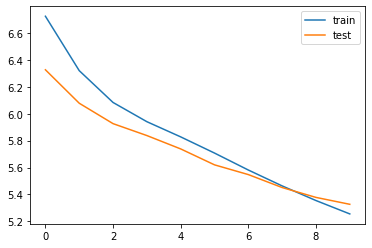

In [63]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

지속적으로 줄어들지만 loss값이 큰 편이다.

## 요약모델 테스트

In [64]:
src_index_to_word=src_tokenizer.index_word #요약문에서 단어를 얻음
tar_word_to_index=tar_tokenizer.word_index #헤드라인에서 정수를 얻음
tar_index_to_word=tar_tokenizer.index_word #헤드라인에서 단어를 얻음

### 새로운 seq2seq 설계

In [65]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [66]:
#이전 시점의 상태들을 저장
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
#초기 상태(initial_state)를 이전 시점의 상태로 사용(다음 단어를 예측하기 위함)
#LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [67]:
#어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])
#디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 
#최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [76]:
def decode_sequence(input_seq):
    #인코더의 상태를 얻음
    e_out,e_h,e_c=encoder_model.predict(input_seq)
    # <SOS>에 해당하는 토큰 생성
    target_seq=np.zeros((1,1))
    target_seq[0,0]=tar_word_to_index['sostoken']
    stop_condition=False
    decoded_sentence=''
    while not stop_condition:
        output_tokens,h,c=decoder_model.predict([target_seq]+[e_out,e_h,e_c])
        sampled_token_index=np.argmax(output_tokens[0,-1,:])
        sampled_token=tar_index_to_word[sampled_token_index]
        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token
        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token=='eostoken' or len(decoded_sentence.split())>=(headlines_max_len-1)):
            stop_condition=True
            
        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq=np.zeros((1,1))
        target_seq[0,0]=sampled_token_index
        #업데이트
        e_h,e_c=h,c
    return decoded_sentence

In [77]:
def seq2text(input_seq):#원문의 정수를 텍스트로 변환
    temp=''
    for i in input_seq:
        if(i!=0):
            temp=temp+src_index_to_word[i]+' '
    return temp

def seq2summary(input_seq):#헤드라인을 텍스트로 변환
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp=temp+tar_index_to_word[i]+' '
    return temp

In [80]:
for i in range(500, 1000):
    print("원문 : ",seq2text(x_test[i]))
    print("실제 헤드라인 :",seq2summary(y_test[i]))
    print("예측 헤드라인 :",decode_sequence(x_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  facebook ceo mark zuckerberg monday denied rumours running post us president rumours began announced visit us states visited end year get perspective make sure best serving community said zuckerberg 
실제 헤드라인 : am not running for public office facebook ceo zuckerberg 
예측 헤드라인 :  facebook is not the the


원문 :  municipal corporation gurugram mcg start door door waste collection december wards officials said residents asked deposit dry wet waste different bags transported designated sites via rickshaws service extended wards coming months officials added 
실제 헤드라인 : to start door to door waste collection from dec 
예측 헤드라인 :  delhi govt to get for get


원문 :  indian air force dismissed pilot sentenced two years imprisonment assaulting senior refusing eat stealing officers mess officer suffered knee injury following declared unfit fly transport aircraft previously claimed harassed following injury 
실제 헤드라인 : iaf pilot gets jail for stealing refusing to eat 
예측 헤드라인 :  man found in delh

예측 헤드라인 :  india to be in india


원문 :  delhi high court thursday said nothing wrong cctv cameras inside said hearing petition delhi government proposal install lakh cctv cameras inside privacy issue related children privacy concerns balanced safety court added nnn 
실제 헤드라인 : nothing wrong with cctv cameras in delhi hc 
예측 헤드라인 :  sc bans not not not rahim sc


원문 :  eu budget commissioner said britain withdrawal bloc could leave billion hole budget brexit could cause gap billion year may double owing increase spending defence security added notably britain asked pay billion brexit bill 
실제 헤드라인 : could create bn gap in eu budget eu commissioner 
예측 헤드라인 :  india to be to be in india


원문 :  official medal sport asian games china olympic council asia announced monday council also introduced demonstration sport asian games indonesia asian games recognised called second largest multi sport event olympics 
실제 헤드라인 : to be medal event at the asian games 
예측 헤드라인 :  world world world world 

예측 헤드라인 :  india to be crore in india


원문 :  brazilian football team head coach tumbled ground celebrating midfielder st minute goal costa fifa world cup friday year old fell pushed ground player revealed picked injury due fall 
실제 헤드라인 : brazil coach to ground while celebrating late goal 
예측 헤드라인 :  player to be in india


원문 :  actress kangana ranaut sister rangoli slammed singer open letter criticised kangana opening previous relationships called one soul call black spot tweeted rangoli wrote two minutes fame 
실제 헤드라인 : kangana sister slams sona for her open letter 
예측 헤드라인 :  kangana khan shares pic of her


원문 :  journalism student abdul khan university beaten death mob april last year named pakistan person year magazine year old khan stripped shot thrown hostel building mob fake allegations posting content online 
실제 헤드라인 : student murdered by mob named pak person of 
예측 헤드라인 :  woman arrested for raping woman in delhi


원문 :  union railway minister piyush goyal said plans railw

예측 헤드라인 :  delhi police to be for get


원문 :  suicide rate us reached highest point least years per us government records cases suicides registered us last year nearly life declined us third consecutive year 
실제 헤드라인 : suicide rates reach year high in us 
예측 헤드라인 :  us man arrested for crore in india


원문 :  maharashtra minister state social justice dilip said saturday journalists write anything money thrashed shoes however later criticised people clarified saying spoke bad elements journalism honest journalists always respected fourth pillar democracy continue 
실제 헤드라인 : journalists should be thrashed with shoes maha bjp minister 
예측 헤드라인 :  delhi cm orders to be for


원문 :  us president donald trump argued war last year movie based vietnam war reports said argument started issue treatment poisoned agent orange war trump confused agent orange use actually shown movie 
실제 헤드라인 : trump with war over vietnam war film report 
예측 헤드라인 :  trump to be trump to be trump


원문 :  aamir khan spe

예측 헤드라인 :  bjp cm cm cm candidate to be


원문 :  police austrian capital vienna detained pakistani migrant suspected killing around people home country according reports year old known pakistan pakistan wanted list reportedly operated people smuggling ring arrested following tip 
실제 헤드라인 : austria arrests of pakistan accused of killing 
예측 헤드라인 :  man found in mumbai airport in mumbai


원문 :  according reports actor abhishek bachchan portray poet upcoming biopic directed actor reportedly lost kilogram play role poet film produced sanjay leela bhansali film mark first collaboration bachchan bhansali 
실제 헤드라인 : abhishek to portray poet in biopic reports 
예측 헤드라인 :  salman to star in film film


원문 :  photograph showing trying climb branch declared overall winner comedy wildlife awards picture duck flying front plane trail air category sea picture slapping fish sea category 
실제 헤드라인 : photo of climbing branch wins comedy wildlife award 
예측 헤드라인 :  scientists not the the


원문 :  indian air 

예측 헤드라인 :  kerala police arrested for students in delhi


원문 :  indira gandhi memorial garden located hill srinagar opened tourists dal lake opens every year days notably reportedly two million planted garden area hectares garden known bagh 
실제 헤드라인 : asia largest garden opens for tourists in kashmir 
예측 헤드라인 :  delhi govt to get in delhi


원문 :  four college students rajasthan alwar allegedly cars make friend birthday memorable according police two accused arrested police still searching two students reportedly inebriated incident used iron rod stick break cars glasses 
실제 헤드라인 : students cars to celebrate friend birthday 
예측 헤드라인 :  kerala police arrested for for


원문 :  shah bjp candidate elections mumbai civic body bmc declared winner lottery shiv sena candidate got number votes sena candidate declared winner counting shah challenged tie declared two candidates three times 
실제 헤드라인 : bjp candidate wins bmc elections through lottery after tie 
예측 헤드라인 :  bjp cm approves bjp in karna

예측 헤드라인 :  govt to be in karnataka


원문 :  year old girl abducted married gangster gunpoint last month returned home bihar girl brought back gangster photograph showing putting girl forehead held gunpoint went viral last week police formed special teams nab 
실제 헤드라인 : minor girl married to gangster at gunpoint returns home 
예측 헤드라인 :  woman arrested for raping woman in delhi


원문 :  technical glitch caused amazon com mistakenly email customers saying received gift company said tuesday email displayed image infant told shoppers received present baby registry however said created baby even babies 
실제 헤드라인 : amazon mistakenly emails users about baby gift 
예측 헤드라인 :  twitter is not not not be


원문 :  former england captain paul became oldest cricketer age years days score century cricket scored balls achieve feat playing england natwest blast sunday century first match career 
실제 헤드라인 : year old becomes oldest to score century 
예측 헤드라인 :  india to be in ipl cricket


원문 :  allahabad bank b

예측 헤드라인 :  bjp is not not not be union


원문 :  uk police investigating manchester terror attack reportedly stopped sharing information us series leaked us media comes uk expressed said us media including photographs remains bomb bomber name could investigation 
실제 헤드라인 : stops sharing intel with us after manchester attack leaks 
예측 헤드라인 :  man to be to be in


원문 :  union home secretary rajiv said lynching hate crimes something new india adding think reported however added crime crime handled fairness recently deputy sp mohammed lynched srinagar mob 
실제 헤드라인 : lynching not new it is being union home secretary 
예측 헤드라인 :  india to be to be


원문 :  woman australia claimed found three year old son mcdonald said dozens white adding absolutely mcdonald raised doubts authenticity claim posted picture bill online 
실제 헤드라인 : live found inside three year old mcdonald burger 
예측 헤드라인 :  woman arrested for woman for woman in


원문 :  turkey scrapped post prime minister new constitution president r

예측 헤드라인 :  will be to be on padmavati


원문 :  tamil nadu leader arrested sunday posting picture facebook portrayed prime minister narendra modi hindu bjp brought notice police lodged complaint demanding action posted picture ahead pm modi visit madurai 
실제 헤드라인 : leader arrested for picture showing pm modi as beggar 
예측 헤드라인 :  delhi police arrested for pm


원문 :  janhvi kapoor talking late mother actress sridevi said acting like breathing mother knowledge cinema acting think never gave watching everything even daily life added janhvi said energy around 
실제 헤드라인 : acting was like breathing for mom janhvi on sridevi 
예측 헤드라인 :  salman khan shares not not kangana


원문 :  municipal corporation gurugram mcg sealed properties tax defaulters since wednesday around properties sealed city far mcg start auctioning sealed properties next month recover dues notably civic body collected around crore property tax last fiscal year 
실제 헤드라인 : seals properties of tax defaulters in days 
예측 헤드라인 :  del

예측 헤드라인 :  apple launches the india in india


원문 :  university claimed lord discovered dinosaurs anyone else also conducting research years existence dinosaurs india added dinosaur named originated india india dinosaur breeding extinction added 
실제 헤드라인 : lord discovered university 
예측 헤드라인 :  uk court apologises for the


원문 :  calling minute interview pm narendra modi fixed interview congress chief spokesperson randeep tuesday said people opposition thugs start days left made statement pm modi claimed lok sabha elections fight people 
실제 헤드라인 : of thugs should start its congress 
예측 헤드라인 :  pm modi modi modi to pm modi


원문 :  year old man uk given two year suspended sentence sexually abusing young girl man believed country oldest person convicted crime pleaded guilty victim filed complaint police th birthday reported local newspaper 
실제 헤드라인 : paedophile aged to be uk oldest criminal 
예측 헤드라인 :  man arrested for raping woman in delhi


원문 :  retired justice shankar passed away aged

예측 헤드라인 :  bjp cm approves bjp in karnataka


원문 :  crpf soon deploy cobra commandos around sukma district chhattisgarh maoists arsenal order assist planned seek additional flying hours indian air force iaf undertake aid cobra operations official reportedly said 
실제 헤드라인 : to be deployed in sukma 
예측 헤드라인 :  kerala police to be in delhi


원문 :  indian railways decided charge extra providing headphones luxury train tejas express receiving complaints passengers stealing government earlier replaced headphones ones costing notably many headphones train stolen four round trips 
실제 헤드라인 : to be charged extra in tejas express for headphones 
예측 헤드라인 :  railways to be in delhi


원문 :  indian origin owners former coffee shop australia fined lakh forcing indian employee return wage threatening cancel visa court found owners paid asking return said felt choice return money 
실제 헤드라인 : cafe forces indian worker to return wage fined lakh 
예측 헤드라인 :  us arabia to be in us


원문 :  two people arrested 

예측 헤드라인 :  india modi to crore in india


원문 :  least ten muslim women wednesday hanuman times temple varanasi seeking end practice triple talaq believed chanting hanuman times makes wishes come true one women said notably two women group victims triple talaq 
실제 헤드라인 : muslim women hanuman to end triple talaq 
예측 헤드라인 :  delhi govt bans to be for


원문 :  pakistan jumped sixth spot icc odi team rankings winning maiden icc champions trophy title defeating india final sunday india still third spot list topped south africa australia first second spot respectively 
실제 헤드라인 : rises to th spot in icc odi team rankings 
예측 헤드라인 :  india to be in india in india


원문 :  least people ground killed helicopter crashed top two mexican state officials said helicopter carrying officials damages caused magnitude earthquake hit mexico friday quake left nearly lakh homes businesses damaged around homes 
실제 헤드라인 : killed as survey chopper crashes in mexico quake zone 
예측 헤드라인 :  killed in mumbai airport 

예측 헤드라인 :  us to be to be pm


원문 :  tunnel love train track spanning distance three kilometres located ukraine track surrounded green known used industrial trains three times day trees reportedly planted deliberately alongside track transport military hardware cold war era 
실제 헤드라인 : train track passes through tunnel of love in ukraine 
예측 헤드라인 :  man gets lakh for lakh in us


원문 :  tokyo court tuesday rejected ousted nissan chairman carlos ghosn appeal end detention ghosn held tokyo jail since arrest november allegedly pay five years arrested fresh allegations income three years detention extended till december 
실제 헤드라인 : court rejects ex nissan chairman appeal to end detention 
예측 헤드라인 :  will not be on sc of sc


원문 :  bihar deputy chief minister sushil kumar modi said rjd chief lalu prasad yadav turning bihar biggest said talking land spanning acres lalu purchased year period annual charge per current rates charges lakh added 
실제 헤드라인 : lalu turning out to be biggest bihar deputy

예측 헤드라인 :  woman arrested for woman for woman in mumbai


원문 :  iraq acknowledged emergency response division committed abuse civilians campaign isis mosul government came response reports claiming raped prisoners tortured death among government forces backed us led coalition fighting isis mosul 
실제 헤드라인 : iraq admits to abuse committed against civilians in mosul 
예측 헤드라인 :  mumbai airport to be in delhi


원문 :  women child development minister maneka gandhi proposed children separated jailed mothers visit thrice week raised prison till age five children get separated mothers resulting many cases trafficking added also proposed child allowed leave district 
실제 헤드라인 : jailed mother child should visit her week maneka 
예측 헤드라인 :  delhi court bans to be for


원문 :  monsoon session concluded friday rajya sabha recorded productivity lok sabha worked scheduled hours short session wherein bills passed lok sabha nine rajya sabha provided spread period days 
실제 헤드라인 : rs records ls during monsoo

예측 헤드라인 :  kohli is the test in india


원문 :  first song titled abhishek bachchan taapsee pannu vicky kaushal starrer manmarziyaan released composed amit trivedi song sung vicky kaushal ali written directed anurag kashyap co produced aanand rai film scheduled release september 
실제 헤드라인 : first song from abhishek taapsee manmarziyaan released 
예측 헤드라인 :  trailer of trailer of film released


원문 :  albert einstein note japanese messenger describing theory happiness auctioned jerusalem million crore read quiet life brings joy success bound constant unrest german born physicist messenger two notes informed winning physics nobel prize 
실제 헤드라인 : einstein note on happiness auctioned for crore 
예측 헤드라인 :  india to be in india in india


원문 :  south african pacer self confessed fan bangladeshi pacer rahman absence ipl tweeted question happened injured fine ireland ahead tri nation series thanks concern replied rahman 
실제 헤드라인 : about rahman ipl absence 
예측 헤드라인 :  player to be for the match




예측 헤드라인 :  actress slams crore to be


원문 :  maharashtra government monday granted administrative approval bandra sea link project project cost estimated crore link expected km long according government resolution bandra club link road link road 
실제 헤드라인 : maha govt grants approval for sea link 
예측 헤드라인 :  delhi govt approves crore in


원문 :  uttar pradesh cm yogi adityanath announced ex gratia lakh families deceased explosion plant cm also announced compensation seriously injured minor injuries least people died injured explosion wednesday 
실제 헤드라인 : cm announces lakh ex gratia for ntpc explosion victims 
예측 헤드라인 :  delhi cm approves students to be


원문 :  kolkata police arrested woman friday allegedly trying poison two manufacturer went collect cash residence cheque bounced asked discount expired however one started collapsing consumed soft drink offered lady 
실제 헤드라인 : woman to avoid payment in kolkata arrested 
예측 헤드라인 :  man arrested for raping woman in delhi


원문 :  anushka sharm

예측 헤드라인 :  killed injured in encounter in delhi


원문 :  father tom recently rescued isis custody said terrorists nice treated well added brought doctor full check even celebrated two freedom whatever want claimed 
실제 헤드라인 : isis terrorists were to me says rescued kerala priest 
예측 헤드라인 :  man arrested for lakh in mumbai


원문 :  brawl two rival french caused flight delays closure terminal france paris airport two way barcelona concert arrested along nine others groups footage brawl showed men chasing kicking one another around departure lounge 
실제 헤드라인 : brawl between french shuts france airport terminal 
예측 헤드라인 :  man found in us in delhi


원문 :  forward sent home fifa world cup refused come substitute croatia victory nigeria year old footballer reportedly cited back injury able play need players fit ready play croatia coach said 
실제 헤드라인 : sent home from world cup after refusing to play 
예측 헤드라인 :  world world world world world world world cup


원문 :  us thursday dropped massive air 

예측 헤드라인 :  delhi govt to get in delhi


원문 :  haryana government granted lakh kin man lynched death alwar recently sub magistrate handed cheque lakh another cheque lakh given state minister khan victim thrashed locals suspected cow 
실제 헤드라인 : haryana govt grants lakh to alwar lynching victim kin 
예측 헤드라인 :  kerala police arrested for students in delhi


원문 :  cricketer gautam gambhir said one say delhi people abuse others looking virat kohli comes naturally culture way brought competitive edge nothing wrong long kept field said gambhir 
실제 헤드라인 : looking at me virat can say abuse more gambhir 
예측 헤드라인 :  am not not not be on india


원문 :  turkish insurance company turkey ordered pay lakh scared nearly death according reports holding area causing panic stampede led deaths turkey manages nearly lakh accidents diseases 
실제 헤드라인 : scared to death by lizard 
예측 헤드라인 :  us arabia to be in india


원문 :  india born professor institute technology mit named dean university school engineering ele

예측 헤드라인 :  india to invest crore in india


원문 :  three midnight sessions parliament conducted since india independence first session marking country independence british two sessions held commemorate silver india independence celebrate years freedom centre hold special midnight meeting gst tonight 
실제 헤드라인 : how many parliament sessions took place at midnight since 
예측 헤드라인 :  india to be in india


원문 :  supreme court issued notices rajasthan haryana uttar pradesh governments plea seeking contempt action preventing violence name cow court asked states take measures violence september last year plea filed gandhi great grandson mahatma gandhi 
실제 헤드라인 : sc notice to states for not cow vigilantism 
예측 헤드라인 :  sc mla orders to be in sc


원문 :  commander year old pilot landed helicopter rooftop house kerala rescue people said counting seconds operation would taken three four seconds chopper said adding glad made right decision 
실제 헤드라인 : was counting seconds pilot who chopper on kerala ro

예측 헤드라인 :  facebook launches users to be


원문 :  india sealed place final tri series defeating bangladesh runs fourth match tournament wednesday indian opener rohit sharma top scored runs also broke record sixes indian final tri series take place sunday 
실제 헤드라인 : india defeat bangladesh to secure tri series final 
예측 헤드라인 :  india to be in india in india


원문 :  air corps world war ii era sign along irish coast burned ground sign means ireland irish language used warn allied german pilots flying neutral country signs around irish coast wwii 
실제 헤드라인 : irish air wwii sign following wildfire 
예측 헤드라인 :  man fined in us in us


